In [331]:
#importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
import sweetviz  as sv
import ydata_profiling as yd
from wordcloud import   WordCloud
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import learning_curve
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , AdaBoostClassifier
from  xgboost import XGBClassifier
from sklearn.model_selection import train_test_split , KFold , cross_val_score

In [332]:
#package for dashboard creation 
#!pip install streamlit

In [333]:
df = pd.read_csv(r"E:\PYTHON PROJECTS\V-S Code Projects\Netflix_Data_Analysis\netflix_dataset.csv")

In [334]:
df.shape

(8790, 10)

In [335]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


**Using ydata_profiling (Pandas_rofilling) Automated Library for Basic Observation and Info**

In [337]:
#Using automated Library Observing data as a Basic dashboard  , to see this report in jupyter notebook we need ipywidgets inside env
#ydata_profile = yd.ProfileReport(df ,explorative=True) 
#Report = ydata_profile.to_file("Ydata_Report.html")
#ydata_profile.to_notebook_iframe()


In [338]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [339]:
#date column is an object inside dataframe , converting it into a datetime  
df["date_added"]=pd.to_datetime(df["date_added"])

In [340]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [341]:
#there is no duplicate values inside a dataset
df.duplicated().sum()

np.int64(0)

In [342]:
#checking there is any null values inside a data
df.isnull().sum().sum() #no null value 

np.int64(0)

In [343]:
#lets see how many  numericals and categorical columns are there inside a dataset
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [344]:
# after observing a data there is only one column as numerical  release year  and every other column considered as categorical, there is no need change their data type

# **Exploratory Data Analysis and Feature Engineering**

In [345]:
#for EDA we don need Date_added column , i can remove it and add one additional Column Month 
#making copy of data 
df_copy = df.copy()
df_copy["month"] = df_copy["date_added"].dt.month
df_copy["year"] = df_copy["date_added"].dt.year
df_copy["day"] = df_copy["date_added"].dt.day
df_copy.drop("date_added" , axis=1 , inplace=True) #droping date_added column 

In [346]:
df_copy.head()

,show_id,type,title,director,country,release_year,rating,duration,listed_in,month,year,day
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90 min,Documentaries,9,2021,25
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",9,2021,24
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",9,2021,24
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021,TV-PG,91 min,"Children & Family Movies, Comedies",9,2021,22
4,s8,Movie,Sankofa,Haile Gerima,United States,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",9,2021,24


In [347]:
df_copy["type"].nunique() #no. of all unique values

2

Text(0.5, 1.0, 'Distribution of Type on netflix')

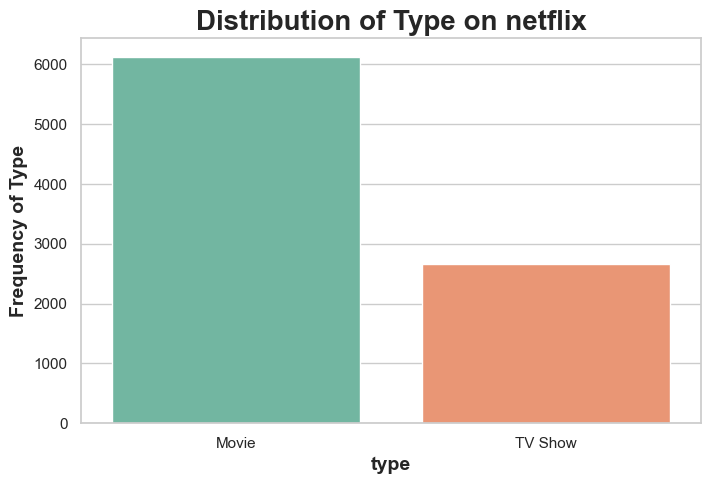

In [348]:
show_type= df_copy["type"].value_counts()
plt.figure(figsize=(8,5))
palatte=sns.color_palette("Set2" , n_colors=2)
sns.set(style="whitegrid")
sns.barplot(x= show_type.index , y=show_type.values , palette=palatte )
plt.xlabel("type" , fontsize=14, fontweight='bold')
plt.ylabel("Frequency of Type" , fontsize=14, fontweight='bold')
plt.title("Distribution of Type on netflix" , fontsize=20, fontweight='bold')

 **Movies has larger no. of Audience on Netflix almost**

Text(0.5, 1.0, 'Top 10 Countries Distribution')

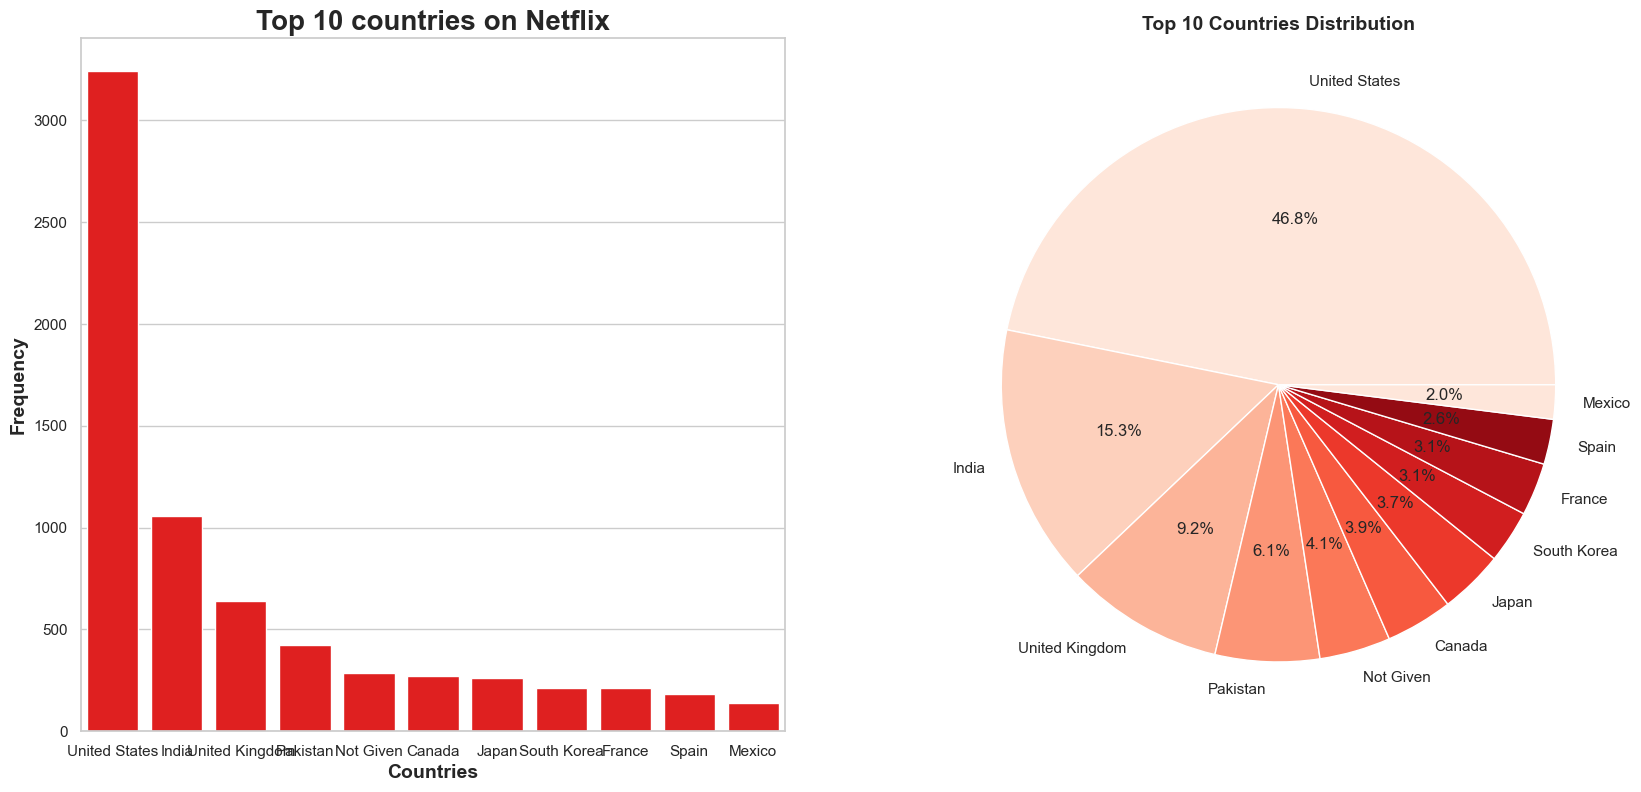

In [349]:
country = df_copy["country"].value_counts()
sns.set(style="whitegrid")
fig, (ax1,ax2)=plt.subplots(1,2 ,figsize=(20,9))
sns.barplot(x=country.index[:11] ,y=country.values[:11]  , color="red"  , ax=ax1)
ax1.set_xlabel("Countries" , fontsize=14, fontweight='bold')
ax1.set_ylabel("Frequency" ,fontsize=14, fontweight='bold')
ax1.set_title("Top 10 countries on Netflix" ,fontsize=20, fontweight='bold')
ax2.pie(country[:11], labels=country.index[:11], autopct='%1.1f%%', colors=sns.color_palette("Reds", 10))  #observing Top 10 Countries on Netflix
ax2.set_title("Top 10 Countries Distribution" ,fontsize=14, fontweight='bold')

**Observation:-**

**After Observing a graph most of the User on Netflix are from United States** . **There also large no. of audience from india , United Kingdom and Pakistan**

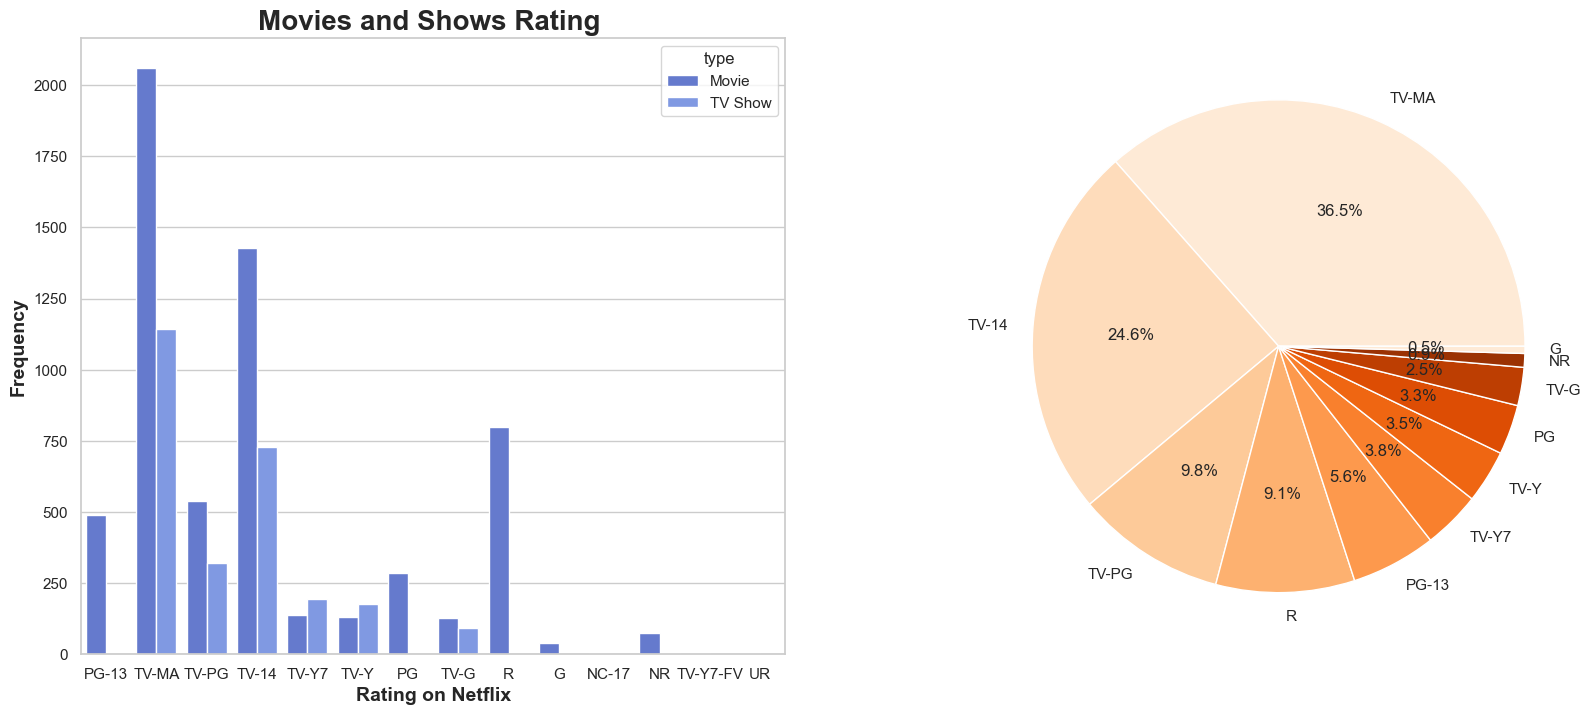

In [350]:
#Observing Rating on Netflix
rating = df_copy['rating'].value_counts()
fig ,(ax1 ,ax2)=plt.subplots(1,2 , figsize=(20,8))
palatte=sns.color_palette("coolwarm" , n_colors=11)
sns.set(style="whitegrid")
sns.countplot(x=df_copy['rating'] , hue=df_copy["type"] ,palette=palatte , ax=ax1 )
ax1.set_xlabel("Rating on Netflix" , fontsize=14, fontweight='bold')
ax1.set_ylabel("Frequency" , fontsize=14, fontweight='bold')
ax1.set_title("Movies and Shows Rating " ,fontsize=20, fontweight='bold')
ax2.pie(rating.values[:11], labels=rating.index[:11], autopct='%1.1f%%', colors=sns.color_palette("Oranges", 10)) 
plt.show()



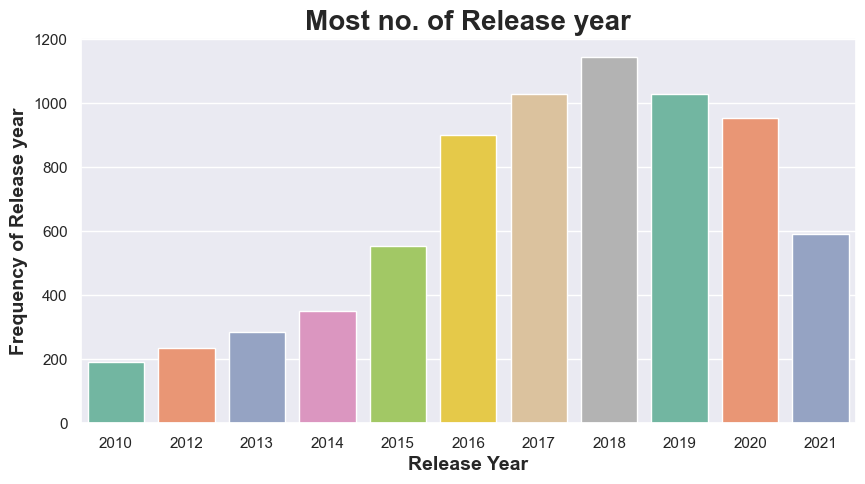

In [351]:
# Checking most releases year 
release_year=df_copy["release_year"].value_counts().head(11)
plt.figure(figsize=(10,5))
palatte=sns.color_palette("Set2" , n_colors=11)
sns.set(style="darkgrid")
sns.barplot(x=release_year.index , y=release_year.values , palette=palatte ) 
plt.xlabel("Release Year" , fontsize=14, fontweight='bold')
plt.ylabel("Frequency of Release year" , fontsize=14, fontweight='bold')
plt.title("Most no. of Release year" , fontsize=20, fontweight='bold')
plt.show()



Text(0.5, 1.0, 'Top 10 Director on netflix')

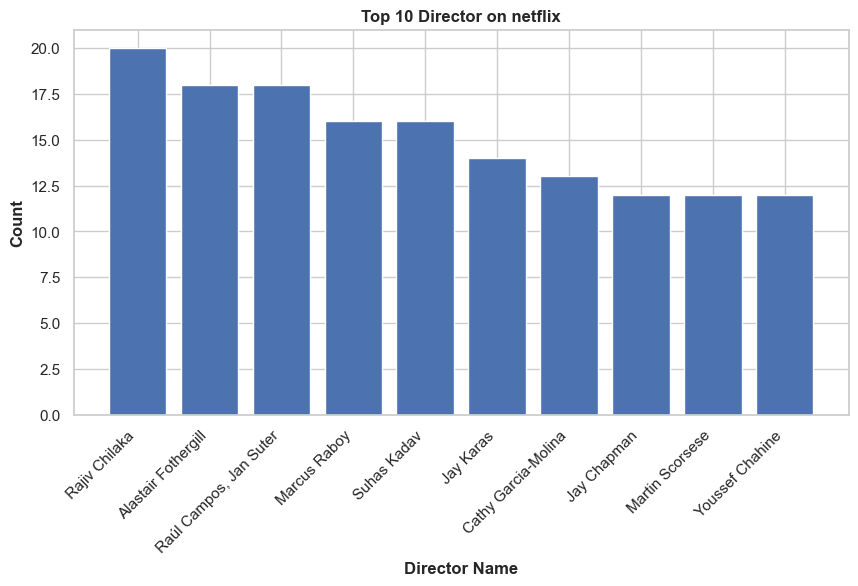

In [352]:
director = df_copy["director"].value_counts().reset_index(name="count").sort_values(by="count",ascending=False)[1:11] #skiping Zero index beacuse name not provided
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
plt.bar(x=director["director"]  , height=director["count"])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Director Name" , fontweight = "bold")
plt.ylabel("Count" , fontweight="bold")
plt.title("Top 10 Director on netflix" , fontweight="bold")


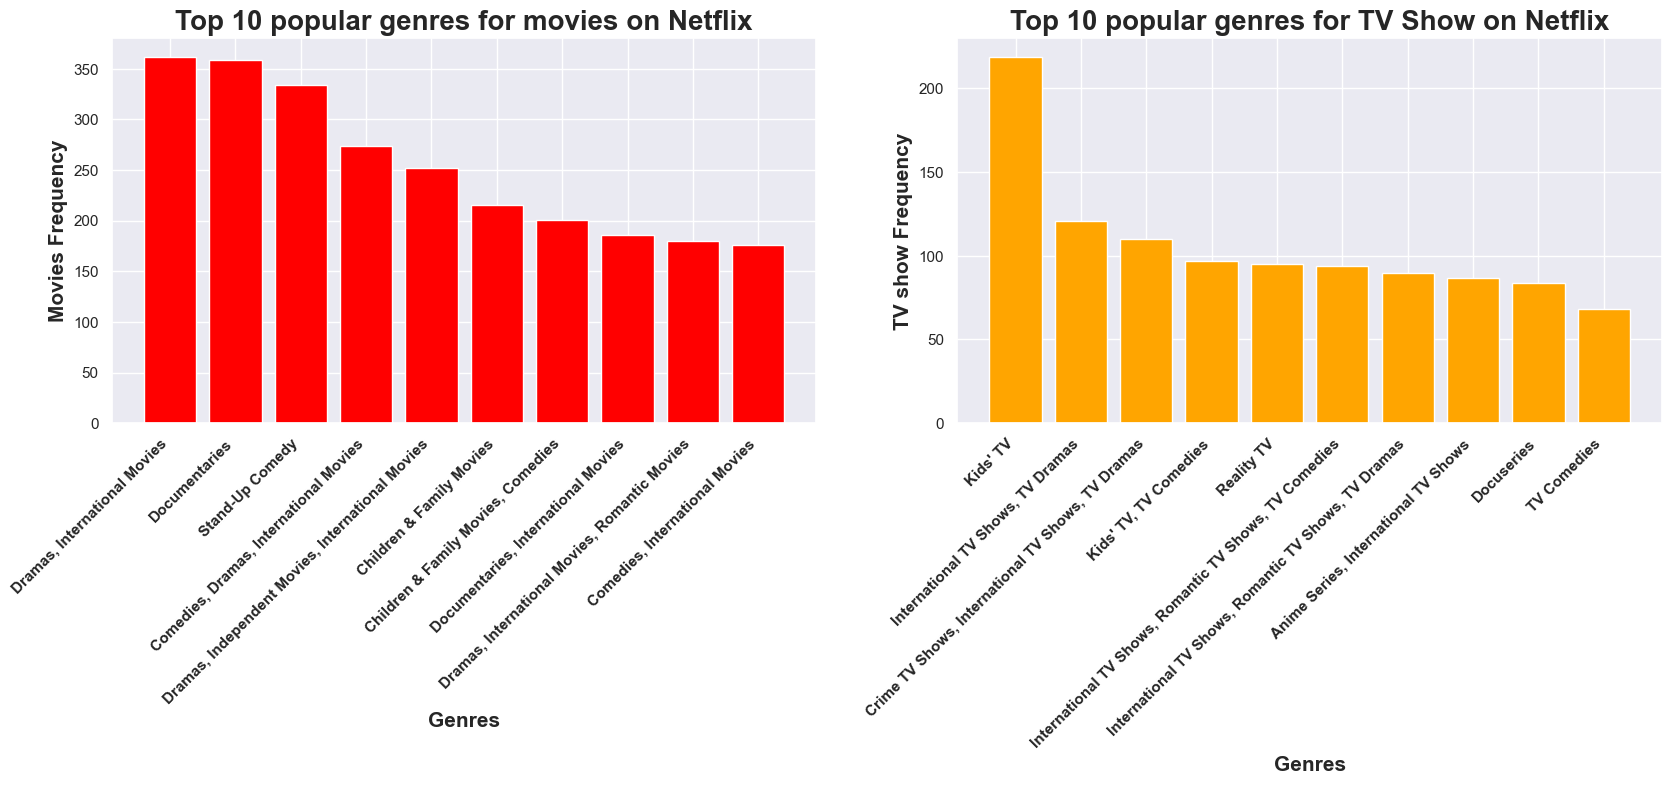

In [353]:
#checking 10 Movies genre on Netflix

top_Movies_genre=df_copy[df_copy["type"]== "Movie"].groupby("listed_in").size().sort_values( ascending=False)[:10]
top_shows_genre=df_copy[df_copy["type"]== "TV Show"].groupby("listed_in").size().sort_values( ascending=False)[:10]
sns.set(style="darkgrid"  , font="sans-serif")
fig , (ax1 , ax2) = plt.subplots(1,2 , figsize = (20,5))
#ploting Top Movies Genre
ax1.bar(x=top_Movies_genre.index , height= top_Movies_genre.values , color= "Red")
ax1.set_xticklabels(labels=top_Movies_genre.index ,rotation=45, ha='right' , fontweight="bold")
ax1.set_xlabel("Genres" ,fontsize=15 , fontweight="bold")
ax1.set_ylabel("Movies Frequency" , fontsize=15 , fontweight="bold")
ax1.set_title("Top 10 popular genres for movies on Netflix" , fontsize=20 , fontweight="bold")
#ploting Top TV show Genre
ax2.bar(x=top_shows_genre.index , height= top_shows_genre.values , color= "Orange")
ax2.set_xticklabels(labels=top_shows_genre.index,rotation=45, ha='right' , fontweight="bold")
ax2.set_xlabel("Genres" ,fontsize=15 , fontweight="bold")
ax2.set_ylabel("TV show Frequency" , fontsize=15 , fontweight="bold")
ax2.set_title("Top 10 popular genres for TV Show on Netflix" , fontsize=20 , fontweight="bold")
plt.show()


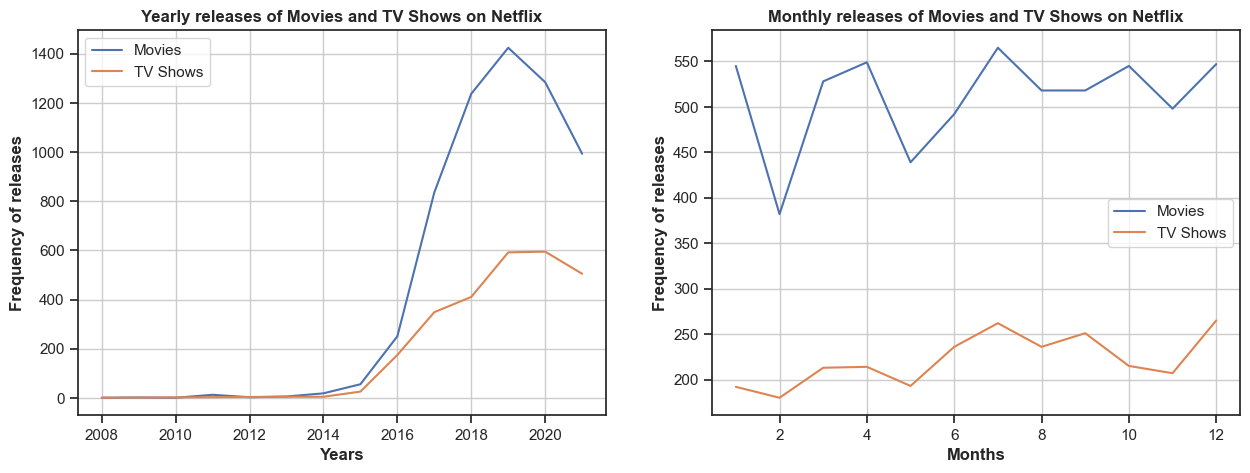

In [354]:
#checking Yearly Most Releases of Movies on Netflix
yearly_movie_releases=df_copy[df_copy['type']=='Movie']['year'].value_counts().sort_index()
yearly_series_releases=df_copy[df_copy['type']=='TV Show']['year'].value_counts().sort_index()
monthly_movie_releases=df_copy[df_copy['type']=='Movie']['month'].value_counts().sort_index()
monthly_series_releases=df_copy[df_copy['type']=='TV Show']['month'].value_counts().sort_index()
#ploting
sns.set(style="ticks")
fig , (ax1 , ax2) = plt.subplots(1,2 , figsize = (15,5))
ax1.plot(yearly_movie_releases.index, yearly_movie_releases.values, label='Movies')
ax1.plot(yearly_series_releases.index, yearly_series_releases.values, label='TV Shows')
ax1.set_xlabel("Years" ,fontweight="bold")
ax1.set_ylabel("Frequency of releases" ,fontweight="bold")
ax1.grid(True)
ax1.legend()
ax1.set_title("Yearly releases of Movies and TV Shows on Netflix" , fontweight="bold")
#checking Monthly Most Releases of Movies on Netflix
ax2.plot(monthly_movie_releases.index, monthly_movie_releases.values, label='Movies')
ax2.plot(monthly_series_releases.index, monthly_series_releases.values, label='TV Shows')
ax2.set_xlabel("Months" ,fontweight="bold")
ax2.set_ylabel("Frequency of releases" ,fontweight="bold")
ax2.grid(True)
ax2.set_title("Monthly releases of Movies and TV Shows on Netflix" , fontweight="bold")
ax2.legend()


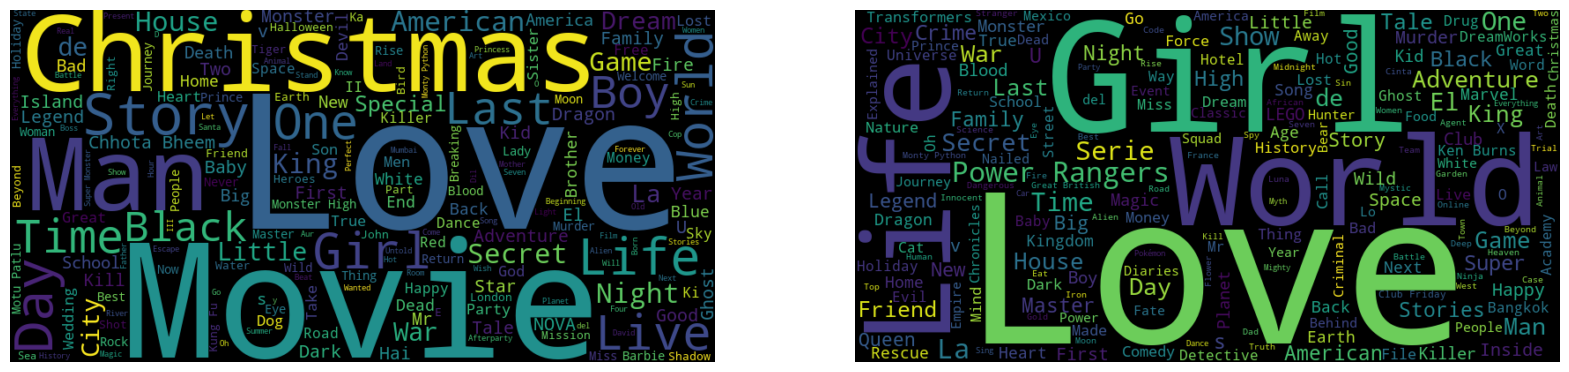

In [355]:
#Building WordCloud  of Movie Titles
Movies_Title = df_copy[df_copy["type"]=="Movie"]["title"]
TV_show_Title = df_copy[df_copy["type"]=="TV Show"]["title"]
wordcloud_Movie = WordCloud(width = 800 , height=400,background_color='black').generate(' '.join(Movies_Title))
wordcloud_TV_Show = WordCloud(width = 800 , height=400,background_color='black').generate(' '.join(TV_show_Title))
# Plot word cloud
fig , (ax1 ,ax2)=plt.subplots(1,2,figsize=(20,5))
ax1.imshow(wordcloud_Movie, interpolation='bilinear')
ax1.axis('off')
ax2.imshow(wordcloud_TV_Show, interpolation='bilinear')
ax2.axis('off')
plt.show()

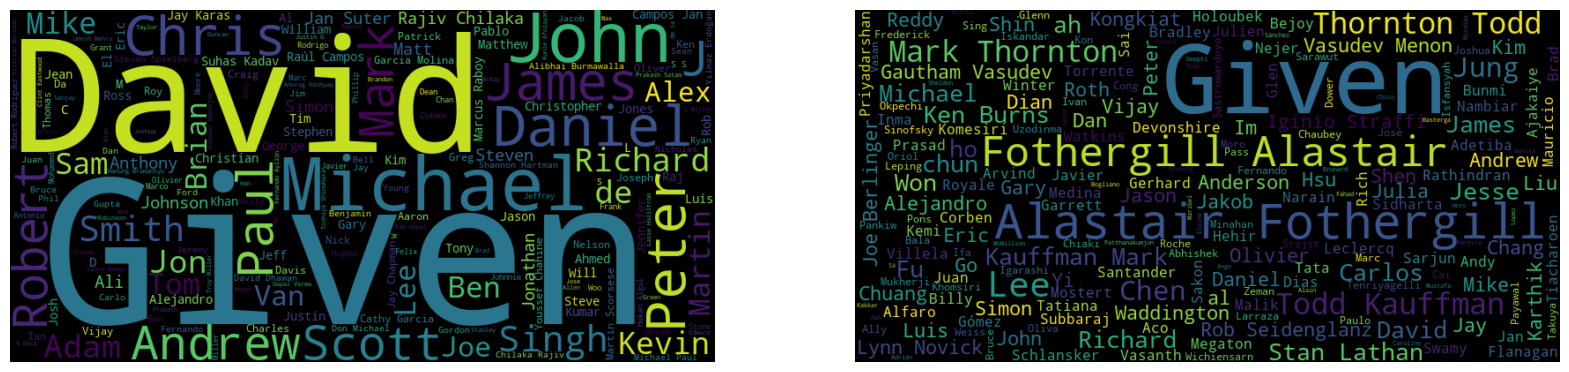

In [356]:
#Building WordCloud of Movie and TV Show Director 
Movies_director = df_copy[df_copy["type"]=="Movie"]["director"]
TV_show_director = df_copy[df_copy["type"]=="TV Show"]["director"]
wordcloud_Movie = WordCloud(width = 800, height=400,background_color='black').generate(' '.join(Movies_director))
wordcloud_TV_Show = WordCloud(width = 800 , height=400,background_color='black').generate(' '.join(TV_show_director))
# Plot word cloud
fig , (ax1 ,ax2)=plt.subplots(1,2,figsize=(20,5))
ax1.imshow(wordcloud_Movie, interpolation='bilinear')
ax1.axis('off')
ax2.imshow(wordcloud_TV_Show, interpolation='bilinear')
ax2.axis('off')
plt.show()

# **Data Transformation**
**This Data is more Complex for Training . All feature are Category and Some feature have Larger no.of Lables such as title column .**

**I am using different types of transforming method for each column**

In [357]:

imputer = SimpleImputer(strategy="most_frequent")
#applying Simple imputer on Country , director and rating
df_copy[["country" , "director" , "rating"]] = imputer.fit_transform(df_copy[["country" , "director" , "rating"]])


In [358]:
#Converting Duration into numericals
def extract_duration(x):
    if 'min' in x:
        return int(x.split(' ')[0])  # Extract numeric part for movies
    elif 'Season' in x or 'Seasons' in x:
        return int(x.split(' ')[0])  # Extract the number of seasons
    else:
        return np.nan  # In case there's unexpected data
    
df_copy["duration_num"]= df_copy["duration"].apply(extract_duration)
df_copy["duration_num"].unique() # it removes min from  dataset and converted seasons into numerical 



array([ 90,   1,  91, 125,   9, 104,  87, 127,  76,  71, 131,  39,  36,
        34,  35,  46,  67,  65,  61, 166, 103,  97, 106,   2,   4, 147,
        94, 161, 111, 110, 105,  96, 124, 116,  98, 115, 122,  55,  99,
        88, 100,   6,   3,  23, 102,  93,  95,  85,  83, 182,   5,  92,
        84,  48, 145, 119,  80, 128, 143, 273, 117, 114, 118, 108,  37,
       121,  63, 142, 113, 154, 120,  82, 109, 101,  86,  77, 229,  15,
        89, 156, 112, 107, 129,  44,  68, 135, 136, 165, 150, 133,  47,
        70,  56,  58,  78, 140,  64,  59,  60,  69,  19,  22, 148, 189,
        54, 141, 130,  81,   7, 138, 132,   8, 123,  66,  62,  74,  38,
        13, 139, 126, 155, 159,  12, 137,  49,  72, 204,  25, 212,  73,
       149, 224, 162,  75,  79,  32, 158, 164, 173, 181, 185,  21,  24,
        51, 151,  42, 134, 177,  52,  53,  57,  28,  50,  26,  45, 171,
        27,  33,  29, 146,  20, 157, 203,  41,  30,  17, 194, 233, 230,
       237, 195, 253, 152, 190, 160, 208, 180, 144, 174, 170, 19

In [359]:
df_copy

,show_id,type,title,director,country,release_year,rating,duration,listed_in,month,year,day,duration_num
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90 min,Documentaries,9,2021,25,90
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",9,2021,24,1
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",9,2021,24,1
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021,TV-PG,91 min,"Children & Family Movies, Comedies",9,2021,22,91
4,s8,Movie,Sankofa,Haile Gerima,United States,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",9,2021,24,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",1,2017,17,2
8786,s8798,TV Show,Zak Storm,Not Given,United States,2016,TV-Y7,3 Seasons,Kids' TV,9,2018,13,3
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",12,2016,15,1
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2016,TV-Y,1 Season,Kids' TV,6,2018,23,1


In [360]:
#Using label encoding for binary labels column (eg.type)

label_encoding= LabelEncoder()
df_copy["type_encoded"]= label_encoding.fit_transform(df_copy["type"]) #type label Movie/TV Show

In [361]:
df_copy

,show_id,type,title,director,country,release_year,rating,duration,listed_in,month,year,day,duration_num,type_encoded
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90 min,Documentaries,9,2021,25,90,0
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",9,2021,24,1,1
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",9,2021,24,1,1
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021,TV-PG,91 min,"Children & Family Movies, Comedies",9,2021,22,91,0
4,s8,Movie,Sankofa,Haile Gerima,United States,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",9,2021,24,125,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",1,2017,17,2,1
8786,s8798,TV Show,Zak Storm,Not Given,United States,2016,TV-Y7,3 Seasons,Kids' TV,9,2018,13,3,1
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",12,2016,15,1,1
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2016,TV-Y,1 Season,Kids' TV,6,2018,23,1,1


**One-Hot Encoding**

In [362]:
#One-Hot Encoding for categorical features
categorical_cols = ['director', 'country', 'rating', 'listed_in']
df_train=df_copy.drop(['show_id', 'title', 'type', 'duration',"month" , "year"  , "day"], axis=1)  # Features)
df_encoded = pd.get_dummies(df_train, columns=categorical_cols, drop_first=True)
df_encoded=df_encoded.astype(int)  #get_dummies gives values as True or False , converting it into integer


**taking target feature type of Content  , based on director and list it predict content type**

In [363]:
x=df_encoded.drop("type_encoded" ,axis=1)
y=df_encoded["type_encoded"]

In [364]:
df_encoded.head()

,release_year,duration_num,type_encoded,director_A. Raajdheep,director_A. Salaam,director_A.R. Murugadoss,director_Aadish Keluskar,director_Aamir Bashir,director_Aamir Khan,director_Aanand Rai,...,"listed_in_TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows","listed_in_TV Dramas, TV Thrillers","listed_in_TV Dramas, Teen TV Shows","listed_in_TV Horror, TV Mysteries, TV Sci-Fi & Fantasy","listed_in_TV Horror, TV Mysteries, TV Thrillers","listed_in_TV Horror, TV Mysteries, Teen TV Shows","listed_in_TV Horror, Teen TV Shows","listed_in_TV Sci-Fi & Fantasy, TV Thrillers",listed_in_TV Shows,listed_in_Thrillers
0,2020,90,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021,91,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1993,125,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [365]:
#Training model  

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.3 , random_state=42)


In [366]:
print(x_train.shape, x_test.shape) #feature are very high beacause of one-hot encoding
print(y_train.shape, y_test.shape)

(6153, 5139) (2637, 5139)
(6153,) (2637,)


# **Model trainig**

In [367]:


tree_clf = DecisionTreeClassifier(max_depth=10 ,random_state=42)
tree_clf.fit(x_train, y_train)
y_pred_dt=tree_clf.predict(x_test)


# **Ploting Descision tree**

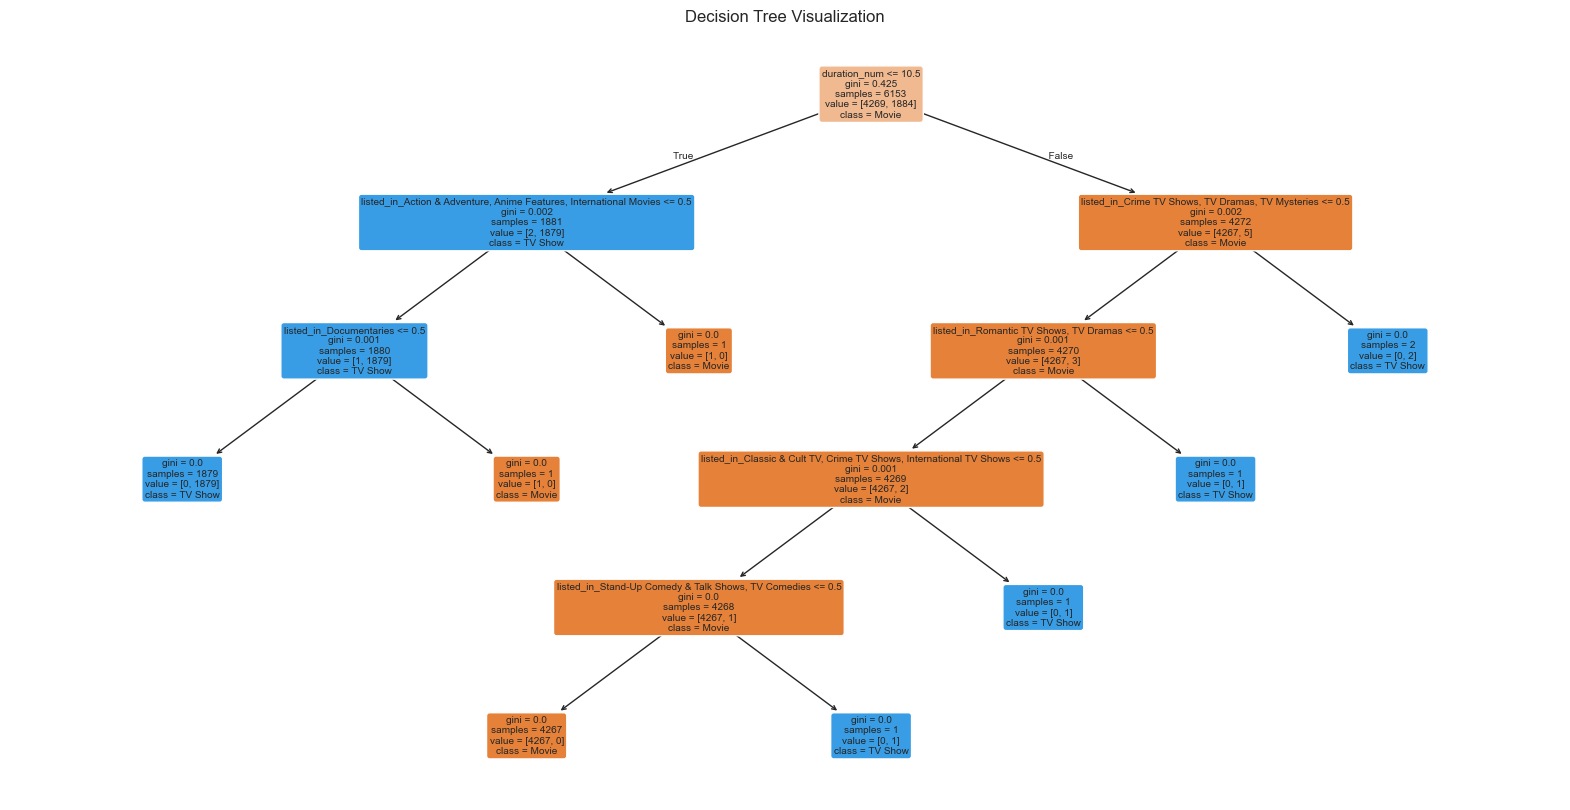

In [368]:

plt.figure(figsize=(20, 10))  # Adjust size as needed
plot_tree(tree_clf, filled=True, feature_names=x.columns, class_names=['Movie', 'TV Show'], rounded=True)
plt.title('Decision Tree Visualization')
plt.show()


In [369]:
from sklearn.metrics import accuracy_score , classification_report , roc_curve , roc_auc_score , auc , precision_score , recall_score , fbeta_score , confusion_matrix
accuracy_score(y_test ,y_pred_dt)

0.9977246871444824

In [370]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
roc_auc = auc(fpr, tpr)



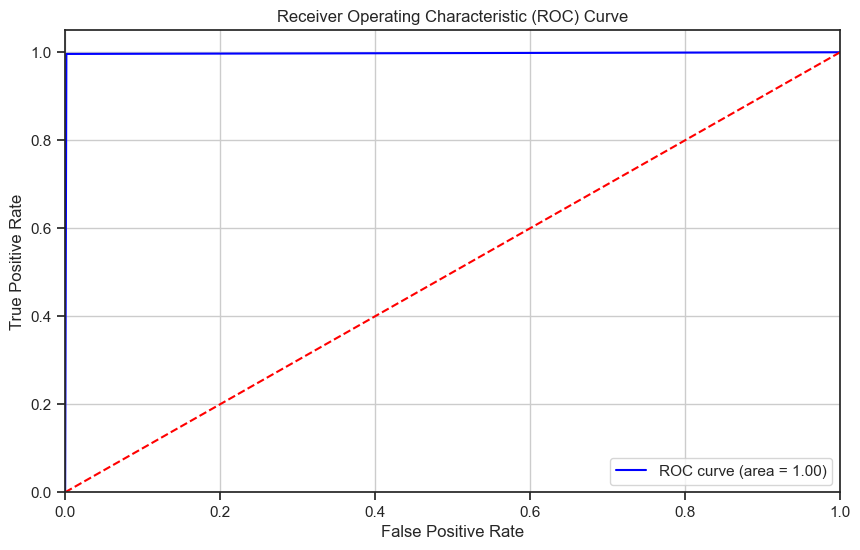

In [371]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [372]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(tree_clf, x, y, cv=kf, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())



Cross-Validation Accuracy Scores: [0.99715586 0.99943117 0.99943117 0.99886234 0.99772469]
Mean Accuracy: 0.9985210466439135
Standard Deviation: 0.0009242364510393558


In [373]:
print(precision_score(y_test , y_pred_dt))
print(recall_score(y_test , y_pred_dt))

0.9961538461538462
0.9961538461538462


In [374]:
# Fit the model
tree_clf.fit(x_train, y_train)

# Evaluate on training data
train_accuracy = tree_clf.score(x_train, y_train)

# Evaluate on test data
test_accuracy = tree_clf.score(x_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 1.0
Test Accuracy: 0.9977246871444824


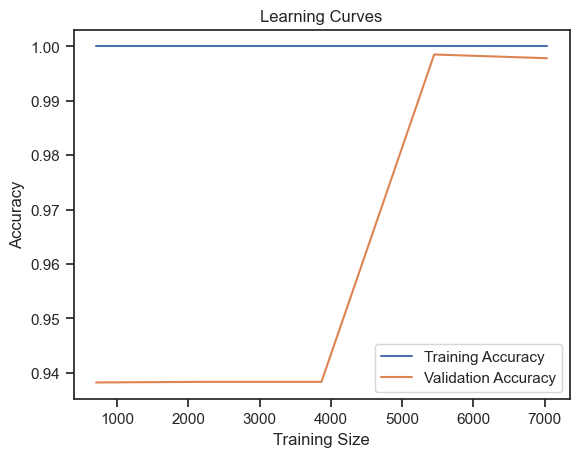

In [375]:



train_sizes, train_scores, test_scores = learning_curve(tree_clf, x, y, cv=5)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.plot(train_sizes, test_mean, label='Validation Accuracy')
plt.title('Learning Curves')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [376]:
#Random Forest model traning
random_tree = RandomForestClassifier(n_estimators=100 ,max_depth=10, random_state=42)
random_tree.fit(x_train , y_train)
y_pred_rf= random_tree.predict(x_test)
print(accuracy_score(y_test , y_pred_rf))

0.9537353052711415


# **ploting Random Tree**

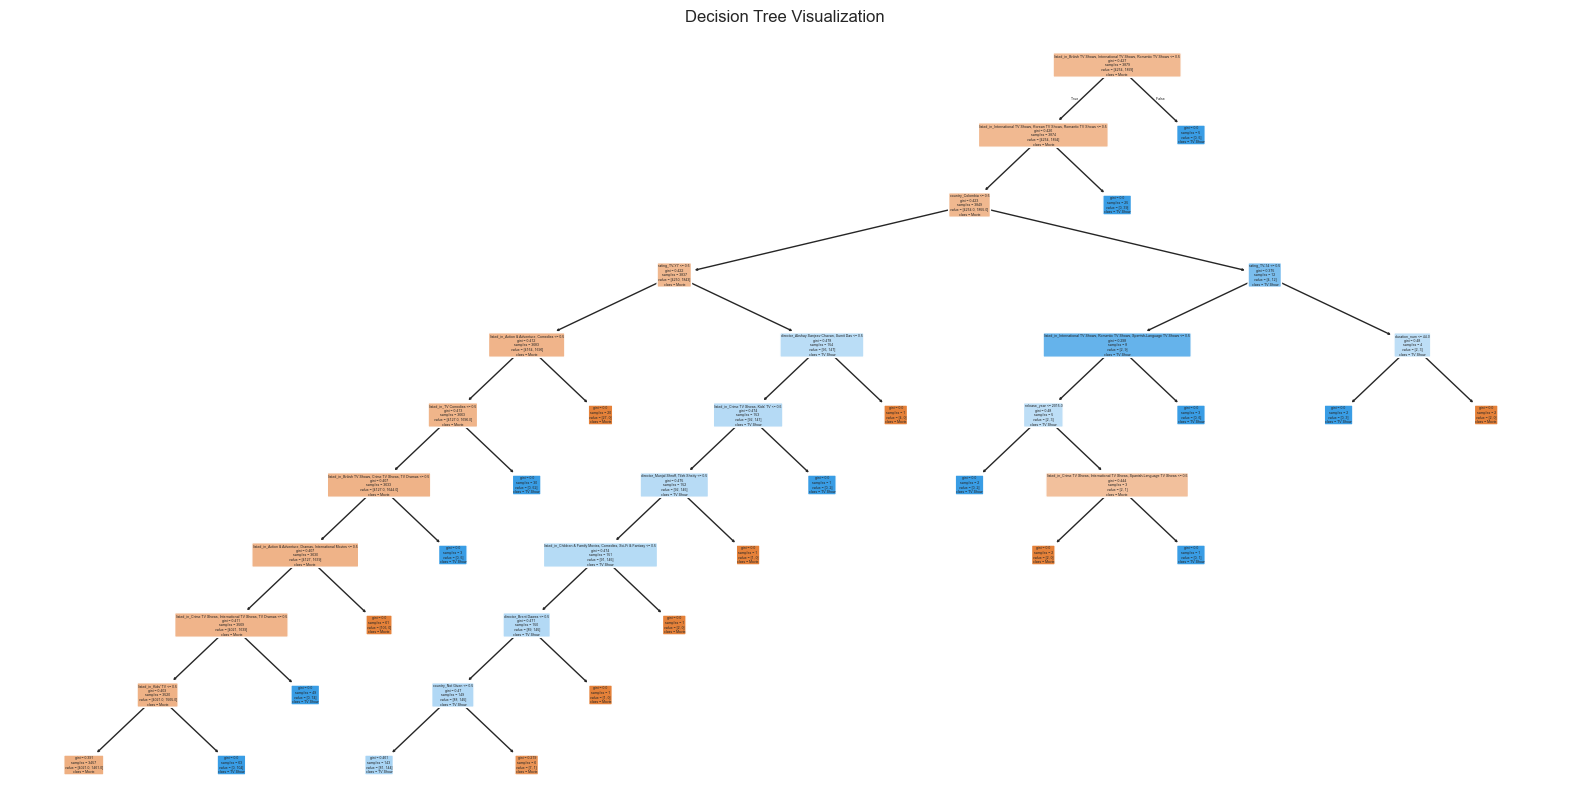

In [377]:
tree = random_tree.estimators_[0]  # Get the first tree
plt.figure(figsize=(20, 10))  # Adjust size as needed
plot_tree(tree, filled=True, feature_names=x.columns, class_names=['Movie', 'TV Show'], rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

In [378]:
#gradient Boosting Model training
gradient_boost = GradientBoostingClassifier(random_state=42)
gradient_boost.fit(x_train , y_train)
y_pred_gb= gradient_boost.predict(x_test)


In [379]:
#XGBoost Model training
xgboost_classifier = XGBClassifier(random_state=42)
xgboost_classifier.fit(x_train , y_train)
y_pred_xgb= xgboost_classifier.predict(x_test)


In [380]:
from sklearn.metrics import precision_score, recall_score
# Step 1: Calculate accuracy for each model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Calculate precision and recall for each model
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')

recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')

# Set your desired beta value (e.g., 1 for F1 score)
beta = 1
# Calculate F-beta score for each model
fbeta_dt = fbeta_score(y_test, y_pred_dt, beta=beta, average='weighted')
fbeta_rf = fbeta_score(y_test, y_pred_rf, beta=beta, average='weighted')
fbeta_gb = fbeta_score(y_test, y_pred_gb, beta=beta, average='weighted')
fbeta_xgb = fbeta_score(y_test, y_pred_xgb, beta=beta, average='weighted')

accuracies = [accuracy_dt, accuracy_rf, accuracy_gb, accuracy_xgb]
# Create lists for precision and recall
precisions = [precision_dt, precision_rf, precision_gb, precision_xgb]
recalls = [recall_dt, recall_rf, recall_gb, recall_xgb]
# Create a list for F-beta scores
fbeta_scores = [fbeta_dt, fbeta_rf, fbeta_gb, fbeta_xgb]


In [381]:
def compile_predictions_and_scores(model_names, predictions, accuracies, precisions, recalls , fbeta_scores):
    """
    Compile predictions and accuracy scores from different models into a DataFrame.

    Parameters:
    model_names : list - List of model names
    predictions : list - List of corresponding predicted labels
    accuracies : list - List of accuracy scores for each model
    precisions : list - List of precision scores for each model
    recalls : list - List of recall scores for each model

    Returns:
    predictions_df : DataFrame - DataFrame containing model names, predictions, accuracy scores, precision, and recall
    """
    # Create a DataFrame
    predictions_df = pd.DataFrame({
        'Model': model_names,
       'Accuracy': accuracies,
        'Precision': precisions,
        'Recall': recalls , 
        'fbeta-Scores':fbeta_scores
    })
    return predictions_df

# Example usage:
model_names = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost']
predictions = [y_pred_dt, y_pred_rf, y_pred_gb, y_pred_xgb]

# Compile into a DataFrame
predictions_df = compile_predictions_and_scores(model_names, predictions, accuracies, precisions, recalls , fbeta_scores)

print("Predictions and Accuracy Scores DataFrame:")
print(predictions_df)


Predictions and Accuracy Scores DataFrame:
               Model  Accuracy  Precision    Recall  fbeta-Scores
0      Decision Tree  0.997725   0.997725  0.997725      0.997725
1      Random Forest  0.953735   0.956587  0.953735      0.952508
2  Gradient Boosting  0.997725   0.997725  0.997725      0.997725
3            XGBoost  0.998483   0.998486  0.998483      0.998484


**XGBoost model performing is very well compare to other models**

# **Hyperparameter Tuning** 

In [384]:

from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV


# Define the parameter distribution for XGBoost
param_dist_xgb = {
    'n_estimators': np.arange(100, 300, 50),  # Range from 100 to 300 with a step of 50
    'max_depth': [3, 6, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.75, 1],
    'colsample_bytree': [0.5, 0.75, 1],
    'gamma': [0, 0.1, 0.2, 0.3]
}

# Initialize XGBoost classifier
xgb_model = XGBClassifier(random_state=42)

# Set up Randomized Search
random_search_xgb = RandomizedSearchCV(estimator=xgb_model,
                                        param_distributions=param_dist_xgb,
                                        n_iter=50,  # Number of random combinations to try
                                        scoring='accuracy',
                                        cv=5,
                                        random_state=42)

random_search_xgb.fit(x_train, y_train)

print("Best Parameters for XGBoost:", random_search_xgb.best_params_)
print("Best Score for XGBoost:", random_search_xgb.best_score_)

grid_search=RandomizedSearchCV(estimator=XGBClassifier()  , param_grid=param_grid , cv=5 , scoring="accuracy")
grid_search.fit(x_train , y_train)
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best Score for XGBoost:", grid_search_xgb.best_score_)


[14:14:14] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:15:03] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




KeyboardInterrupt: 